In [1]:
import sys
sys.path.append('/home/nicolol/workspace/QuICCPython/')
from spectral_state import SpectralState
from physical_state import PhysicalState
import numpy as np
from matplotlib import pyplot as plt

#filename= '/home/nicolol/LocalRuns/CouetteImplicit/state0000.hdf5'
filename = 'stateCouetteWInstability.hdf5'
filenamePhyiscal = 'visStateCouetteWInstability.hdf5'
a = SpectralState(filename, 'shell', 'QuICC')
b = PhysicalState(filenamePhyiscal, 'shell', 'QuICC')

/usr/local/lib/python3.6/dist-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


<HDF5 dataset "bc_velocity": shape (), type "<f8">
<HDF5 dataset "ekman": shape (), type "<f8">
<HDF5 dataset "ro": shape (), type "<f8">
<HDF5 dataset "rossby": shape (), type "<f8">
<HDF5 dataset "rratio": shape (), type "<f8">
<HDF5 dataset "time": shape (), type "<f8">
<HDF5 dataset "timestep": shape (), type "<f8">
<HDF5 group "/truncation/physical" (3 members)>
<HDF5 group "/truncation/spectral" (3 members)>
<HDF5 group "/truncation/transform" (3 members)>
<HDF5 dataset "velocity_pol": shape (4610, 120), type "|V16">
<HDF5 dataset "velocity_tor": shape (4610, 120), type "|V16">


In [2]:
# import the plot settings and use the right ones
from matplotlib import pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


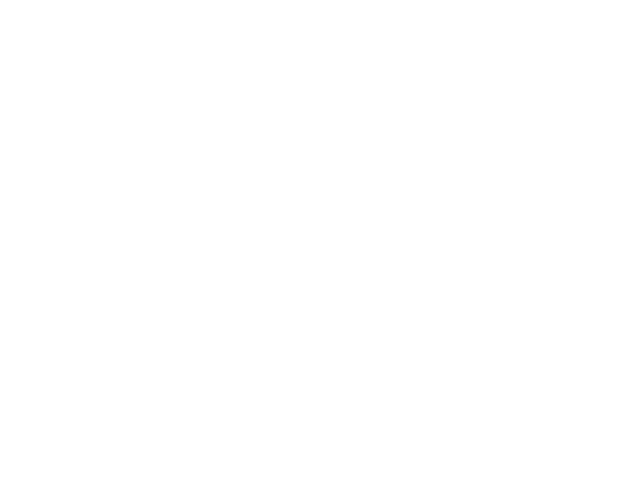

(0.0035920562838234094,
 1.5384302011581756,
 -1.538410575439513,
 1.538410575439513)

In [3]:

SpectralFieldMeridional = a.makeMeridionalSlice()
X, Y, U = SpectralFieldMeridional
plt.figure(1)
plt.subplot(131)
f1 = plt.contourf(X, Y, U[0].T, 100, cmap='coolwarm')
plt.colorbar(f1)
plt.axis('equal')
plt.subplot(132)
f2 = plt.contourf(X, Y, U[1].T , 100, cmap='coolwarm')
plt.colorbar(f2)
plt.axis('equal')
plt.subplot(133)
f3 = plt.contourf(X, Y, U[2].T , 100, cmap='coolwarm')
plt.colorbar(f3)
plt.axis('equal')

<IPython.core.display.Javascript object>


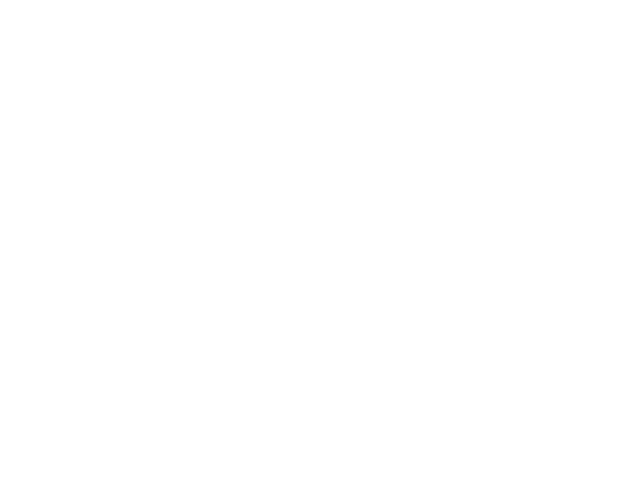

(0.003592056283823408,
 1.5384302011581754,
 -1.5384105754395128,
 1.5384105754395128)

In [4]:
PhysicalFieldMeridional = b.makeMeridionalSlice()
X, Y, U2= PhysicalFieldMeridional
plt.figure(2)
plt.subplot(131)
f1 = plt.contourf(X, Y, U2[0].T, 100, cmap='coolwarm')
plt.colorbar(f1)
plt.axis('equal')

plt.subplot(132)
f2 = plt.contourf(X, Y, U2[1].T, 100, cmap='coolwarm')
plt.colorbar(f2)
plt.axis('equal')

plt.subplot(133)
f3 = plt.contourf(X, Y, U2[2].T, 100, cmap='coolwarm')
plt.colorbar(f3)
plt.axis('equal')

(192, 360)
(192, 360)
2.610241257998695e-13
3.7208567639787474e-14


<IPython.core.display.Javascript object>


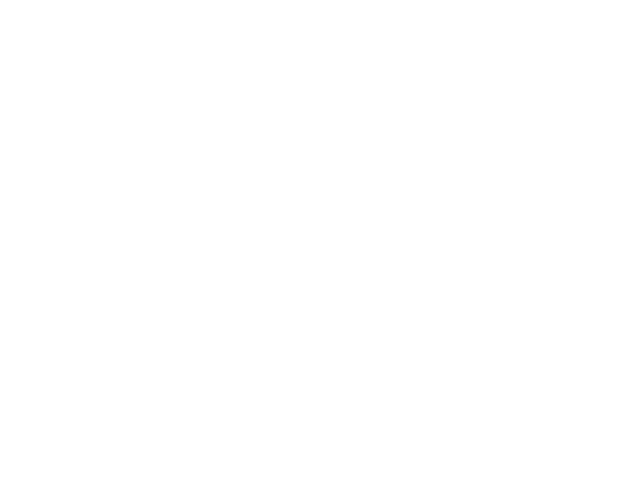

In [5]:
print(SpectralFieldMeridional[2][0].shape)
print(PhysicalFieldMeridional[2][0].shape)
print(np.linalg.norm(SpectralFieldMeridional[0] - PhysicalFieldMeridional[0]))
print(np.linalg.norm(SpectralFieldMeridional[1] - PhysicalFieldMeridional[1]))

plt.figure(3)
plt.subplot(131)
f1 = plt.contourf(X, Y, U[0].T-U2[0].T)
plt.colorbar(f1)
plt.subplot(132)
f2 = plt.contourf(X, Y, U[1].T-U2[1].T)
plt.colorbar(f2)
plt.subplot(133)
f3 = plt.contourf(X, Y, U[2].T-U2[2].T)
plt.colorbar(f3)


<IPython.core.display.Javascript object>


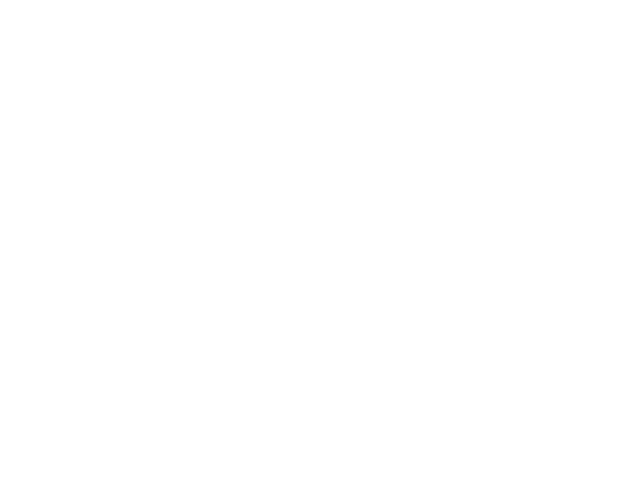

(-1.538444805420239, 1.538444805420239, -1.538444805420239, 1.538444805420239)

In [6]:
# test the grid functionality function
SpectralFieldEquatorial = a.makeEquatorialSlice()
X, Y, V = SpectralFieldEquatorial
plt.figure(4)
plt.subplot(131)
f1 = plt.contourf(X, Y, V[0].T, 100, cmap='coolwarm')
plt.colorbar(f1)
plt.axis('equal')
plt.subplot(132)
f2 = plt.contourf(X, Y, V[1].T, 100, cmap='coolwarm')
plt.colorbar(f2)
plt.axis('equal')
plt.subplot(133)
f3 = plt.contourf(X, Y, V[2].T, 100, cmap='coolwarm')
plt.colorbar(f3)
plt.axis('equal')


0.004357267173232371 -0.004357267173232371


<IPython.core.display.Javascript object>


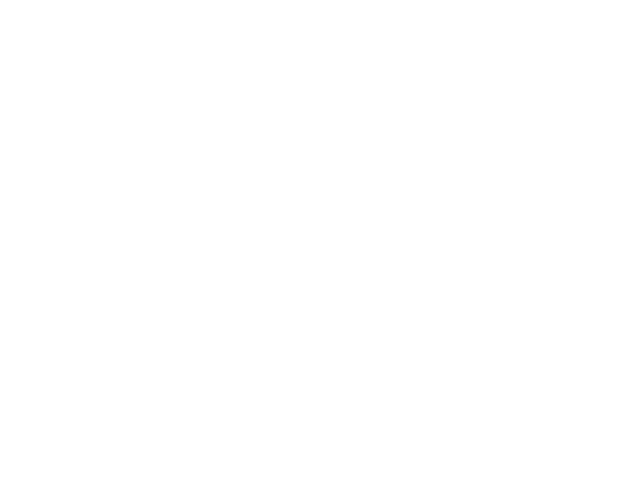

(-1.5384448054202389,
 1.5384448054202389,
 -1.5384448054202389,
 1.5384448054202389)

In [7]:
PhysicalFieldEquatorial = b.makeEquatorialSlice()
X, Y, V2 = PhysicalFieldEquatorial
plt.figure(5)
plt.subplot(131)
f1 = plt.contourf(X, Y, V2[0].T, 100, cmap='coolwarm')
plt.colorbar(f1)
plt.axis('equal')

plt.subplot(132)
f2 = plt.contourf(X, Y, V2[1].T, 100, cmap='coolwarm')
plt.colorbar(f2)
plt.axis('equal')

plt.subplot(133)
f3 = plt.contourf(X, Y, V2[2].T, 100, cmap='coolwarm')
plt.colorbar(f3)
plt.axis('equal')

(192, 61)
(192, 60)
2.843016116662498e-14
4.114113563787884e-14


<IPython.core.display.Javascript object>


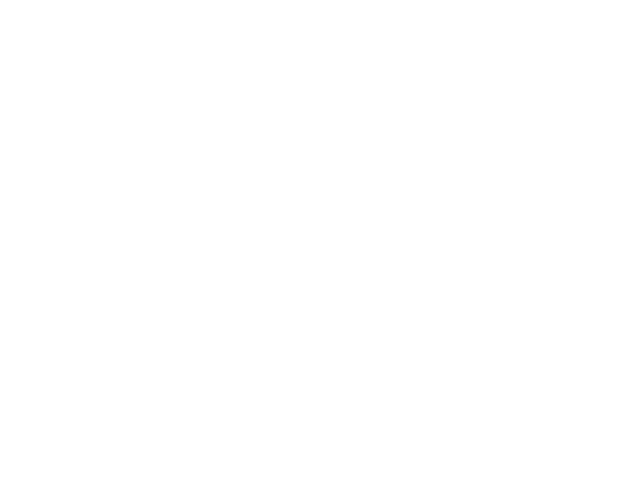

(-1.5384448054202389,
 1.5384448054202389,
 -1.5384448054202389,
 1.5384448054202389)

In [8]:
print(SpectralFieldEquatorial[2][0].shape)
print(PhysicalFieldEquatorial[2][0].shape)
print(np.linalg.norm(SpectralFieldEquatorial[0][:-1,:] - PhysicalFieldEquatorial[0]))
print(np.linalg.norm(SpectralFieldEquatorial[1][:-1,:] - PhysicalFieldEquatorial[1]))

plt.figure(6)
plt.subplot(131)
f1 = plt.contourf(X, Y, V[0][:, :-1].T-V2[0].T)
plt.colorbar(f1)
plt.axis('equal')
plt.subplot(132)
f2 = plt.contourf(X, Y, V[1][:, :-1].T-V2[1].T)
plt.colorbar(f2)
plt.axis('equal')
plt.subplot(133)
f3 = plt.contourf(X, Y, V[2][:,:-1].T-V2[2].T)
plt.colorbar(f3)
plt.axis('equal')


<IPython.core.display.Javascript object>


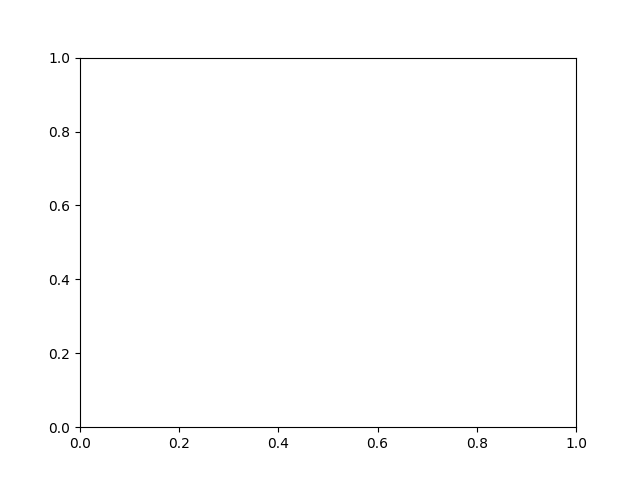

ValueError: x and y must have same first dimension, but have shapes (360,) and (1,)

In [9]:
X, Y, r, theta = a.makeMeridionalGrid()
%matplotlib notebook
plt.plot(np.cos(theta), a.plm(1,95))

In [ ]:
print('From the integration we get: ',E)

In [ ]:
print('Toroidal field comparison: ', 0.02378987586475785/0.0059470545736911)

In [ ]:
print('Poloidal field comparison: ', 0.0001740008850909491/4.4064358212004e-05)

In [ ]:
/0.023784692175416473

In [ ]:
# test mode dictionary functions
idx_dict = a.idxlm()

In [ ]:
E = np.array(a.compute_energy())/4